# **Business Goal**
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### **Steps to achieve the desired business goal:**
1. Data Capture
2. Data Understanding & Preparation.
3. Exploratory Data Analysis.
4. Model Building & Evaluation.
5. Summary

In [1]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## 1. Data Capture

In [2]:
# Let's read the data
df = pd.read_csv('train.csv', na_values='NaN')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

## 2. Data Understanding & Preparation

In [3]:
# Inspecting dataset
# Let's check the shape of the data
print('Shape of the data is:', df.shape)

Shape of the data is: (1460, 81)


In [4]:
# Let's check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

In [6]:
# For the year columns, let's convert them into present age to make them numeric and more easily understandable

current_year = int(datetime.datetime.now().year)
df['YearBuilt_Age'] = current_year-df.YearBuilt
df['YearRemodAdd_Age'] = current_year - df.YearRemodAdd
df['GarageYrBlt_Age'] = current_year - df.GarageYrBlt
df['YrSold_Age'] = current_year - df.YrSold

df[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Age','YearRemodAdd_Age',
             'GarageYrBlt_Age','YrSold_Age']].sample(10)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  YearBuilt_Age  \
158        2004          2005       2004.0    2010             19   
1220       1964          1964       1964.0    2006             59   
1030       1916          1995          NaN    2006            107   
1163       1969          1969       1969.0    2008             54   
361        1940          1982       1940.0    2008             83   
271        1954          2005       1954.0    2008             69   
394        1940          1950       1940.0    2007             83   
647        1953          1953       1953.0    2008             70   
1441       2004          2004       2004.0    2008             19   
245        1988          1988       1988.0    2006             35   

      YearRemodAdd_Age  GarageYrBlt_Age  YrSold_Age  
158                 18             19.0          13  
1220                59             59.0          17  
1030                28              NaN          17  
1163                54             54.0          15  
361                 41             83.0          15  
271                 18             69.0          15  
394                 73             83.0          16  
647                 70             70.0          15  
1441                19             19.0          15  
245                 35             35.0          17

In [7]:
df.drop(['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold'], axis = 1, inplace = True)

In [8]:
# drop the Id column
df.drop('Id', axis=1, inplace=True)

In [9]:
# Let's check the percentage of null values
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total   Percent
PoolQC        1453  0.995205
MiscFeature   1406  0.963014
Alley         1369  0.937671
Fence         1179  0.807534
FireplaceQu    690  0.472603

In [10]:
# Replace NA for poolQC with 'No Pool'
df.PoolQC.fillna('No Pool', inplace=True)
# Replace NA for Fence with 'No Fence'
df.Fence.fillna('No Fence', inplace=True)
# Replace NA for MiscFeature with 'None'
df.MiscFeature.fillna('None', inplace=True)
# Replace NA for Alley with 'No alley access'
df.Alley.fillna('No alley access', inplace=True)
# Replace NA for FireplaceQu with 'No Fireplace'
df.FireplaceQu.fillna('No Fireplace', inplace=True)
# Replace NA for BsmtQual with 'No Basement'
df.BsmtQual.fillna('No Basement', inplace=True)
# Replace NA for BsmtCond with 'No Basement'
df.BsmtCond.fillna('No Basement', inplace=True)
# Replace NA for BsmtExposure with 'No Basement'
df.BsmtExposure.fillna('No Basement', inplace=True)
# Replace NA for BsmtFinType1 with 'No Basement'
df.BsmtFinType1.fillna('No Basement', inplace=True)
# Replace NA for BsmtFinType2 with 'No Basement'
df.BsmtFinType2.fillna('No Basement', inplace=True)
# Replace NA for GarageType with 'No Garage'
df.GarageType.fillna('No Garage', inplace=True)
# Replace NA for GarageFinish with 'No Garage'
df.GarageFinish.fillna('No Garage', inplace=True)
# Replace NA for GarageQual with 'No Garage'
df.GarageQual.fillna('No Garage', inplace=True)
# Replace NA for GarageCond with 'No Garage'
df.GarageCond.fillna('No Garage', inplace=True)

In [11]:
# Let's check the percentage of null values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total   Percent
LotFrontage        259  0.177397
GarageYrBlt_Age     81  0.055479
MasVnrArea           8  0.005479
MasVnrType           8  0.005479
Electrical           1  0.000685

In [12]:
# Drop LotFrontage column
df.drop('LotFrontage', axis=1, inplace=True)

In [13]:
# Fill NA numerical columns with median
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt_Age'].fillna(df['GarageYrBlt_Age'].median(), inplace=True)
df['MasVnrType'].fillna("None", inplace=True)

In [14]:
# Let's check the percentage of null values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total   Percent
Electrical        1  0.000685
MSSubClass        0  0.000000
TotRmsAbvGrd      0  0.000000
GarageArea        0  0.000000
GarageCars        0  0.000000

In [15]:
df.dropna(inplace=True)

In [16]:
# Let's check the percentage of null values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
MSSubClass        0      0.0
TotRmsAbvGrd      0      0.0
GarageArea        0      0.0
GarageCars        0      0.0
GarageFinish      0      0.0

From the data dictionary, we see that the predictor variables 'MSSubClass' , 'OverallQual' & 'OverallCond' are actually categorical variables. Although they have numerical values but they all are mapped to different categories as follows:

MSSubClass: Identifies the type of dwelling involved in the sale.

OverallQual: Rates the overall material and finish of the house

OverallCond: Rates the overall condition of the house

Let's change it to a categorical variable so that we do not miss on analyzing it well and do the mapping accordingly for them to be used as dummy variables later.¶


In [17]:
df['MSSubClass']=df['MSSubClass'].astype('object')
df['OverallQual']=df['OverallQual'].astype('object')
df['OverallCond']=df['OverallCond'].astype('object')

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1459 non-null   object 
 1   MSZoning          1459 non-null   object 
 2   LotArea           1459 non-null   int64  
 3   Street            1459 non-null   object 
 4   Alley             1459 non-null   object 
 5   LotShape          1459 non-null   object 
 6   LandContour       1459 non-null   object 
 7   Utilities         1459 non-null   object 
 8   LotConfig         1459 non-null   object 
 9   LandSlope         1459 non-null   object 
 10  Neighborhood      1459 non-null   object 
 11  Condition1        1459 non-null   object 
 12  Condition2        1459 non-null   object 
 13  BldgType          1459 non-null   object 
 14  HouseStyle        1459 non-null   object 
 15  OverallQual       1459 non-null   object 
 16  OverallCond       1459 non-null   object 


In [19]:
# Numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print('Numerical columns:', num_cols)

Numerical columns: ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'YearBuilt_Age', 'YearRemodAdd_Age', 'GarageYrBlt_Age', 'YrSold_Age']


In [20]:
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
print('Categorical columns:', cat_cols)

Categorical columns: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## 3. Exploratory Data Analysis.

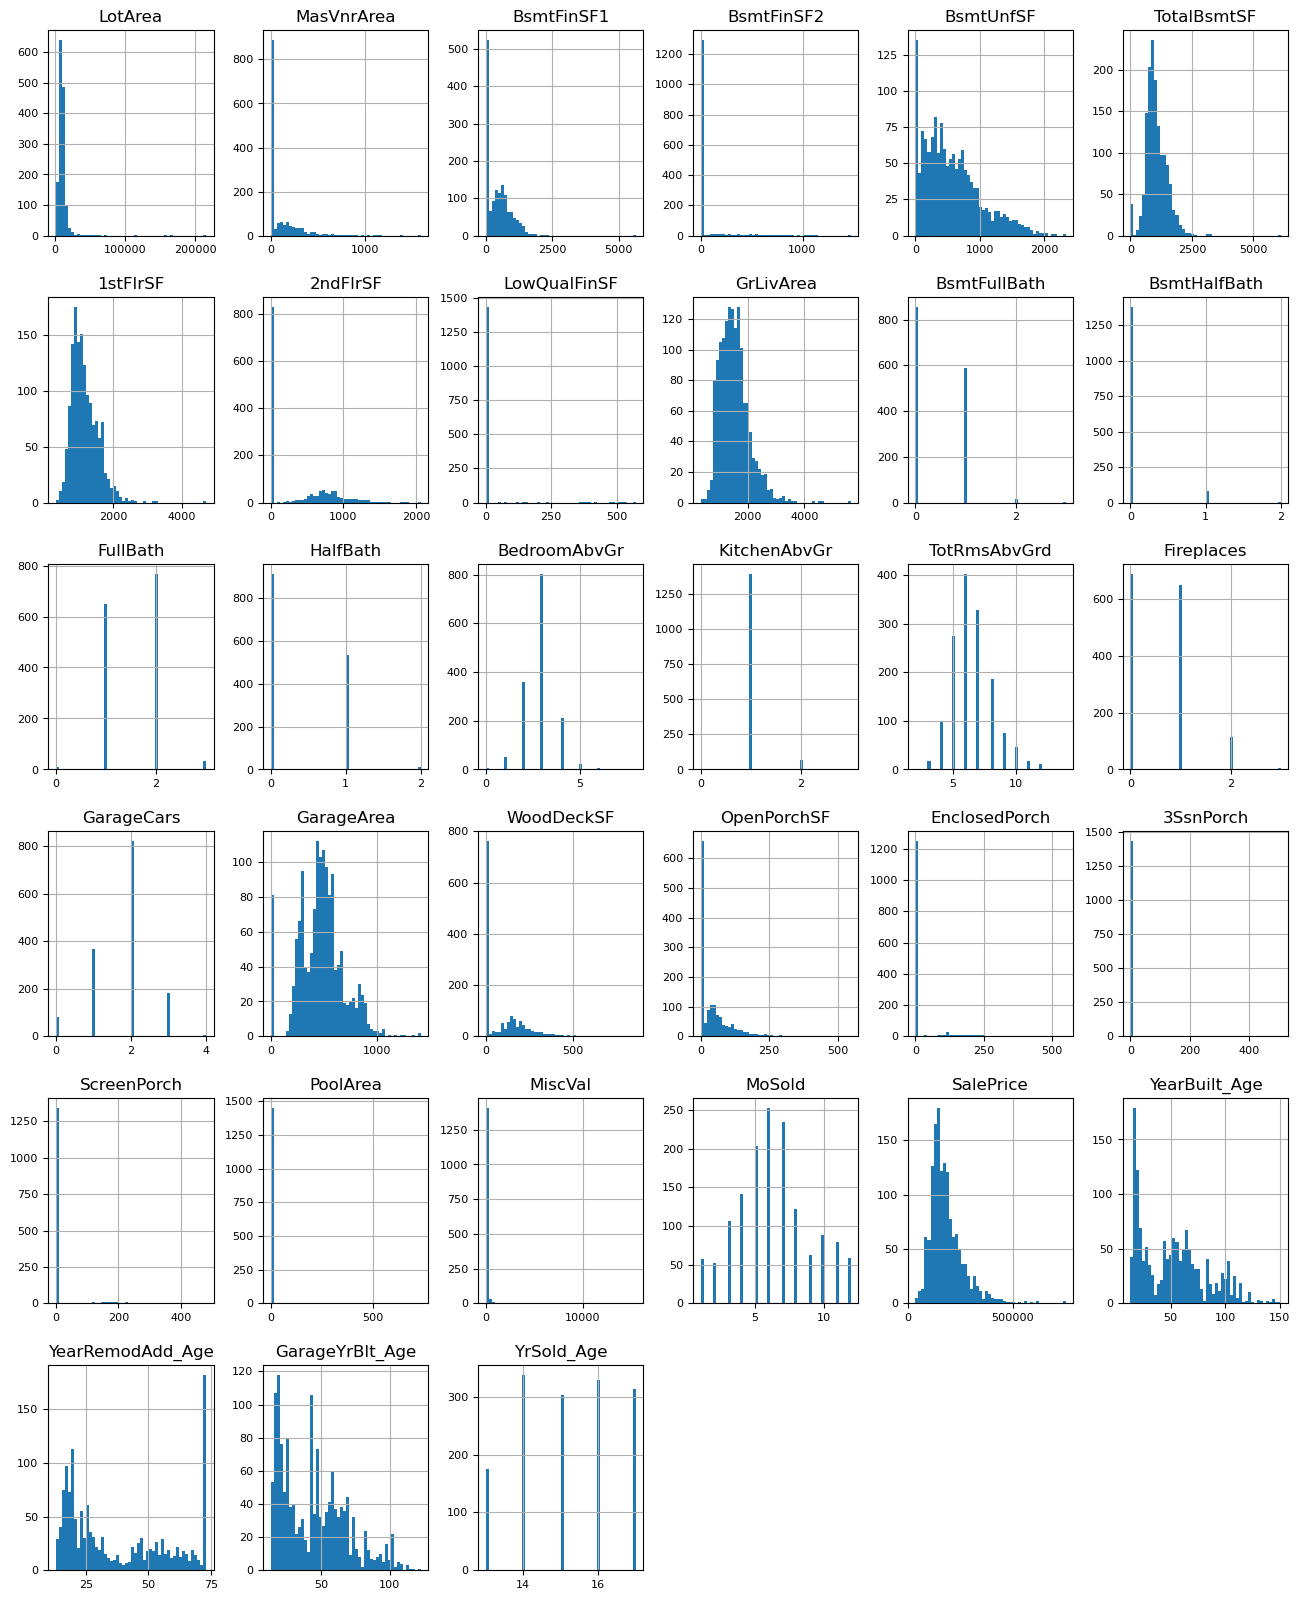

In [21]:
# plot the histogram of numerical columns
df[num_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

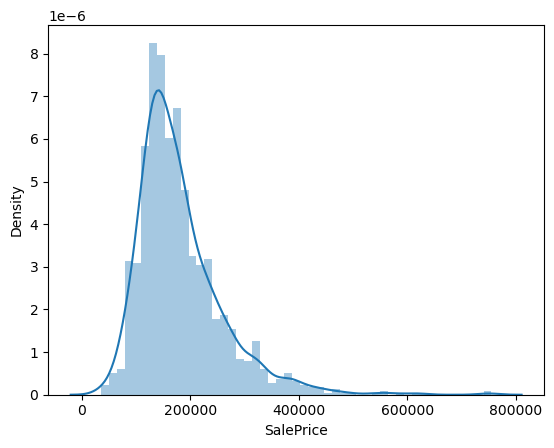

In [22]:
# Analyzing the target variable
sns.distplot(df.SalePrice)
plt.show()
# Inference
# The target variable is right skewed and hence we will apply log transformation to make it normally distributed

In [23]:
# Let's check the skewness of the target variable
print('Skewness of SalePrice is:', df.SalePrice.skew())
# Inference
# The skewness of the target variable is 1.88 which is greater than 1 and hence the target variable is right skewed

Skewness of SalePrice is: 1.8819429948035529


In [24]:
# Let's apply log transformation to make the target variable normally distributed
df['TransformedPrice'] = np.log(df['SalePrice'])

# Let's check the skewness of the target variable again
print('Skewness of SalePrice is:', df.TransformedPrice.skew())
# Inference
# The skewness of the target variable is 0.12 which is less than 1 and hence the target variable is normally distributed

Skewness of SalePrice is: 0.12131775882415026


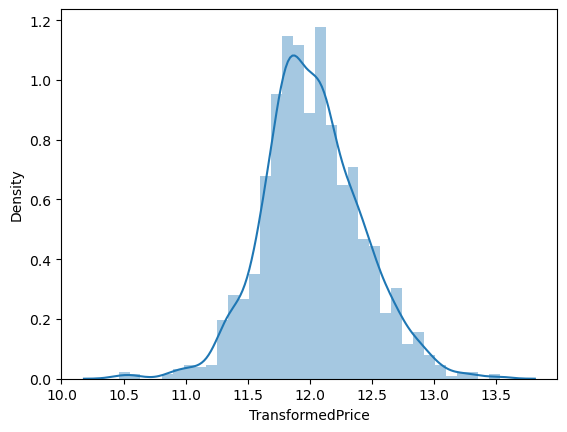

In [25]:
# Let's plot the histogram of the target variable again
sns.distplot(df.TransformedPrice)
plt.show()
# Inference
# The target variable is normally distributed after applying log transformation

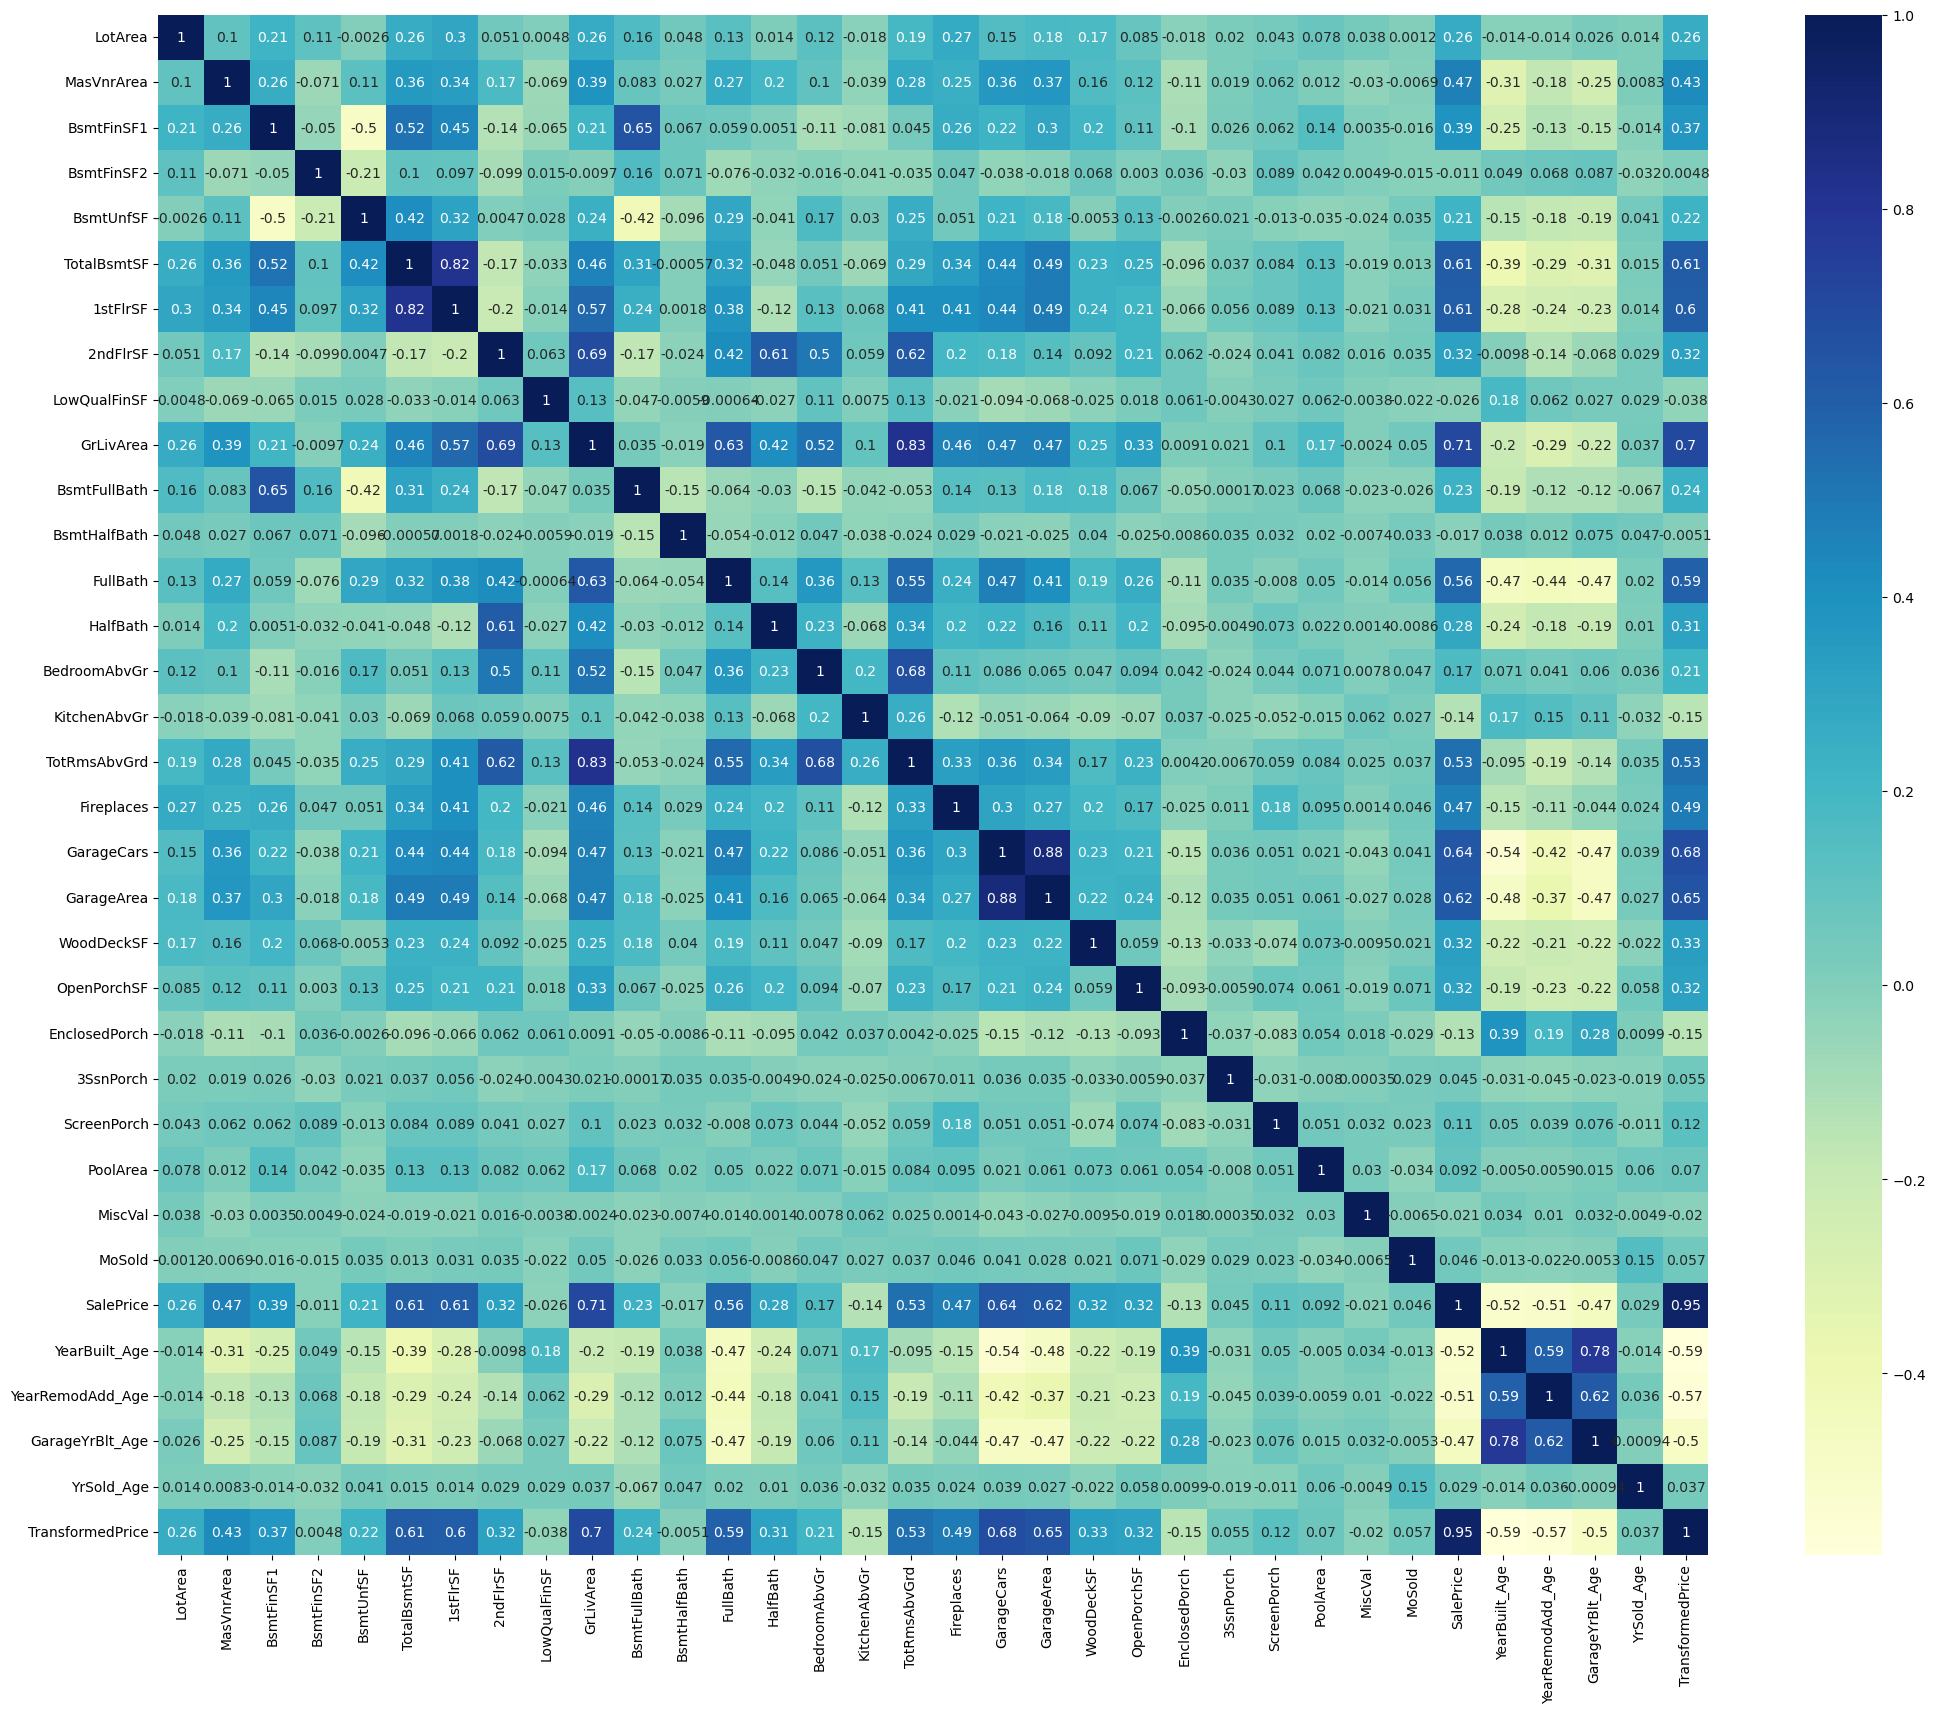

In [26]:
# Let's check the correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()
# Inference
# 1. The target variable SalePrice is highly correlated with OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd, GarageYrBlt, MasVnrArea, Fireplaces, BsmtFinSF1, LotFrontage, WoodDeckSF, 2ndFlrSF, OpenPorchSF, HalfBath, LotArea, BsmtFullBath, BsmtUnfSF, BedroomAbvGr, ScreenPorch, PoolArea, MoSold, 3SsnPorch, BsmtFinSF2, BsmtHalfBath, MiscVal, LowQualFinSF, YrSold
# 2. The features GarageCars and GarageArea are highly correlated with each other
# 3. The features TotRmsAbvGrd and GrLivArea are highly correlated with each other
# 4. The features TotalBsmtSF and 1stFlrSF are highly correlated with each other
# 5. The features YearBuilt and GarageYrBlt are highly correlated with each other
# 6. The features GrLivArea and FullBath are highly correlated with each other
# 7. The features 2ndFlrSF and HalfBath are highly correlated with each other
# 8. The features BsmtFinSF1 and BsmtFullBath are highly correlated with each other
# 9. The features BsmtFinSF2 and BsmtHalfBath are highly correlated with each other
# 10. The features OpenPorchSF and WoodDeckSF are highly correlated with each other
# 11. The features EnclosedPorch and YearRemodAdd are highly correlated with each other
# 12. The features BsmtFinSF1 and BsmtUnfSF are highly correlated with each other
# 13. The features BsmtFinSF2 and BsmtUnfSF are highly correlated with each other
# 14. The features GarageArea and GarageYrBlt are highly correlated with each other


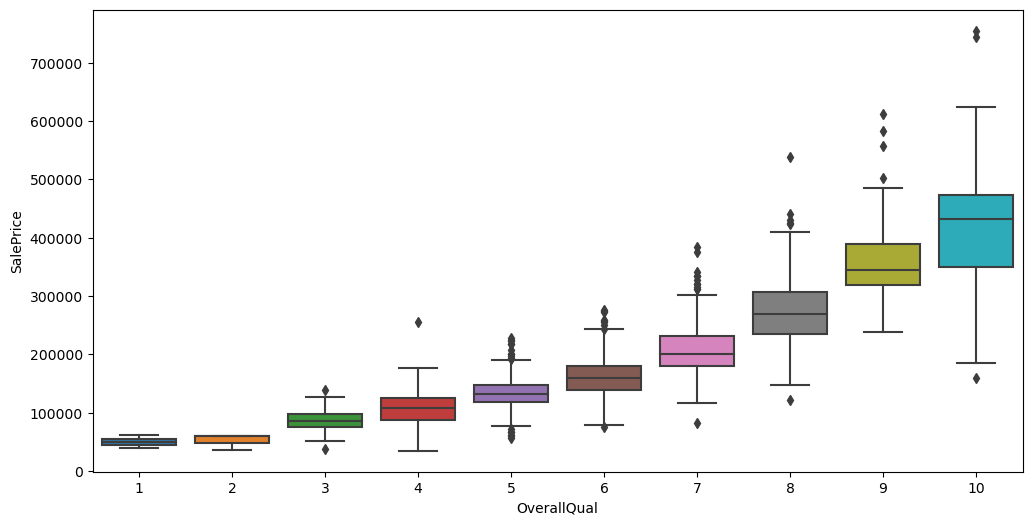

In [27]:
# overallqual vs saleprice
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df);
# Inference: As the overall quality increases, the sale price also increases

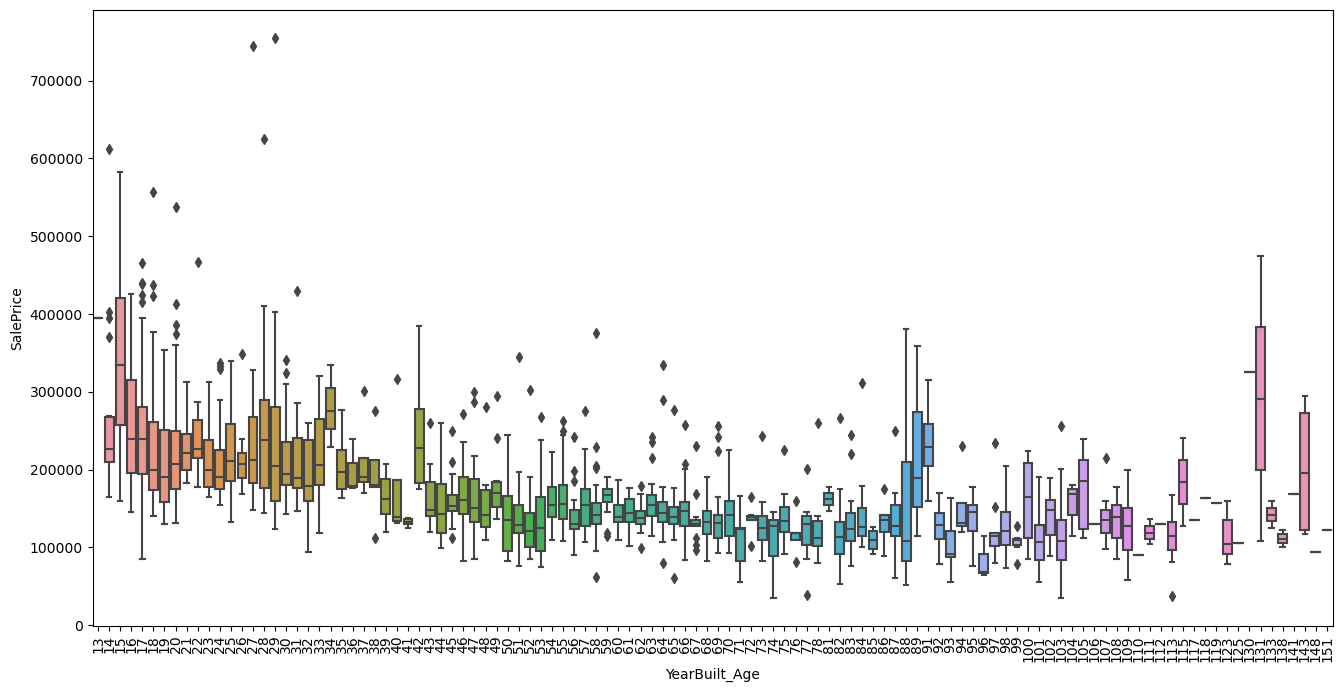

In [28]:
var = 'YearBuilt_Age'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);
# Inference: As the year built age increases, the sale price also increases

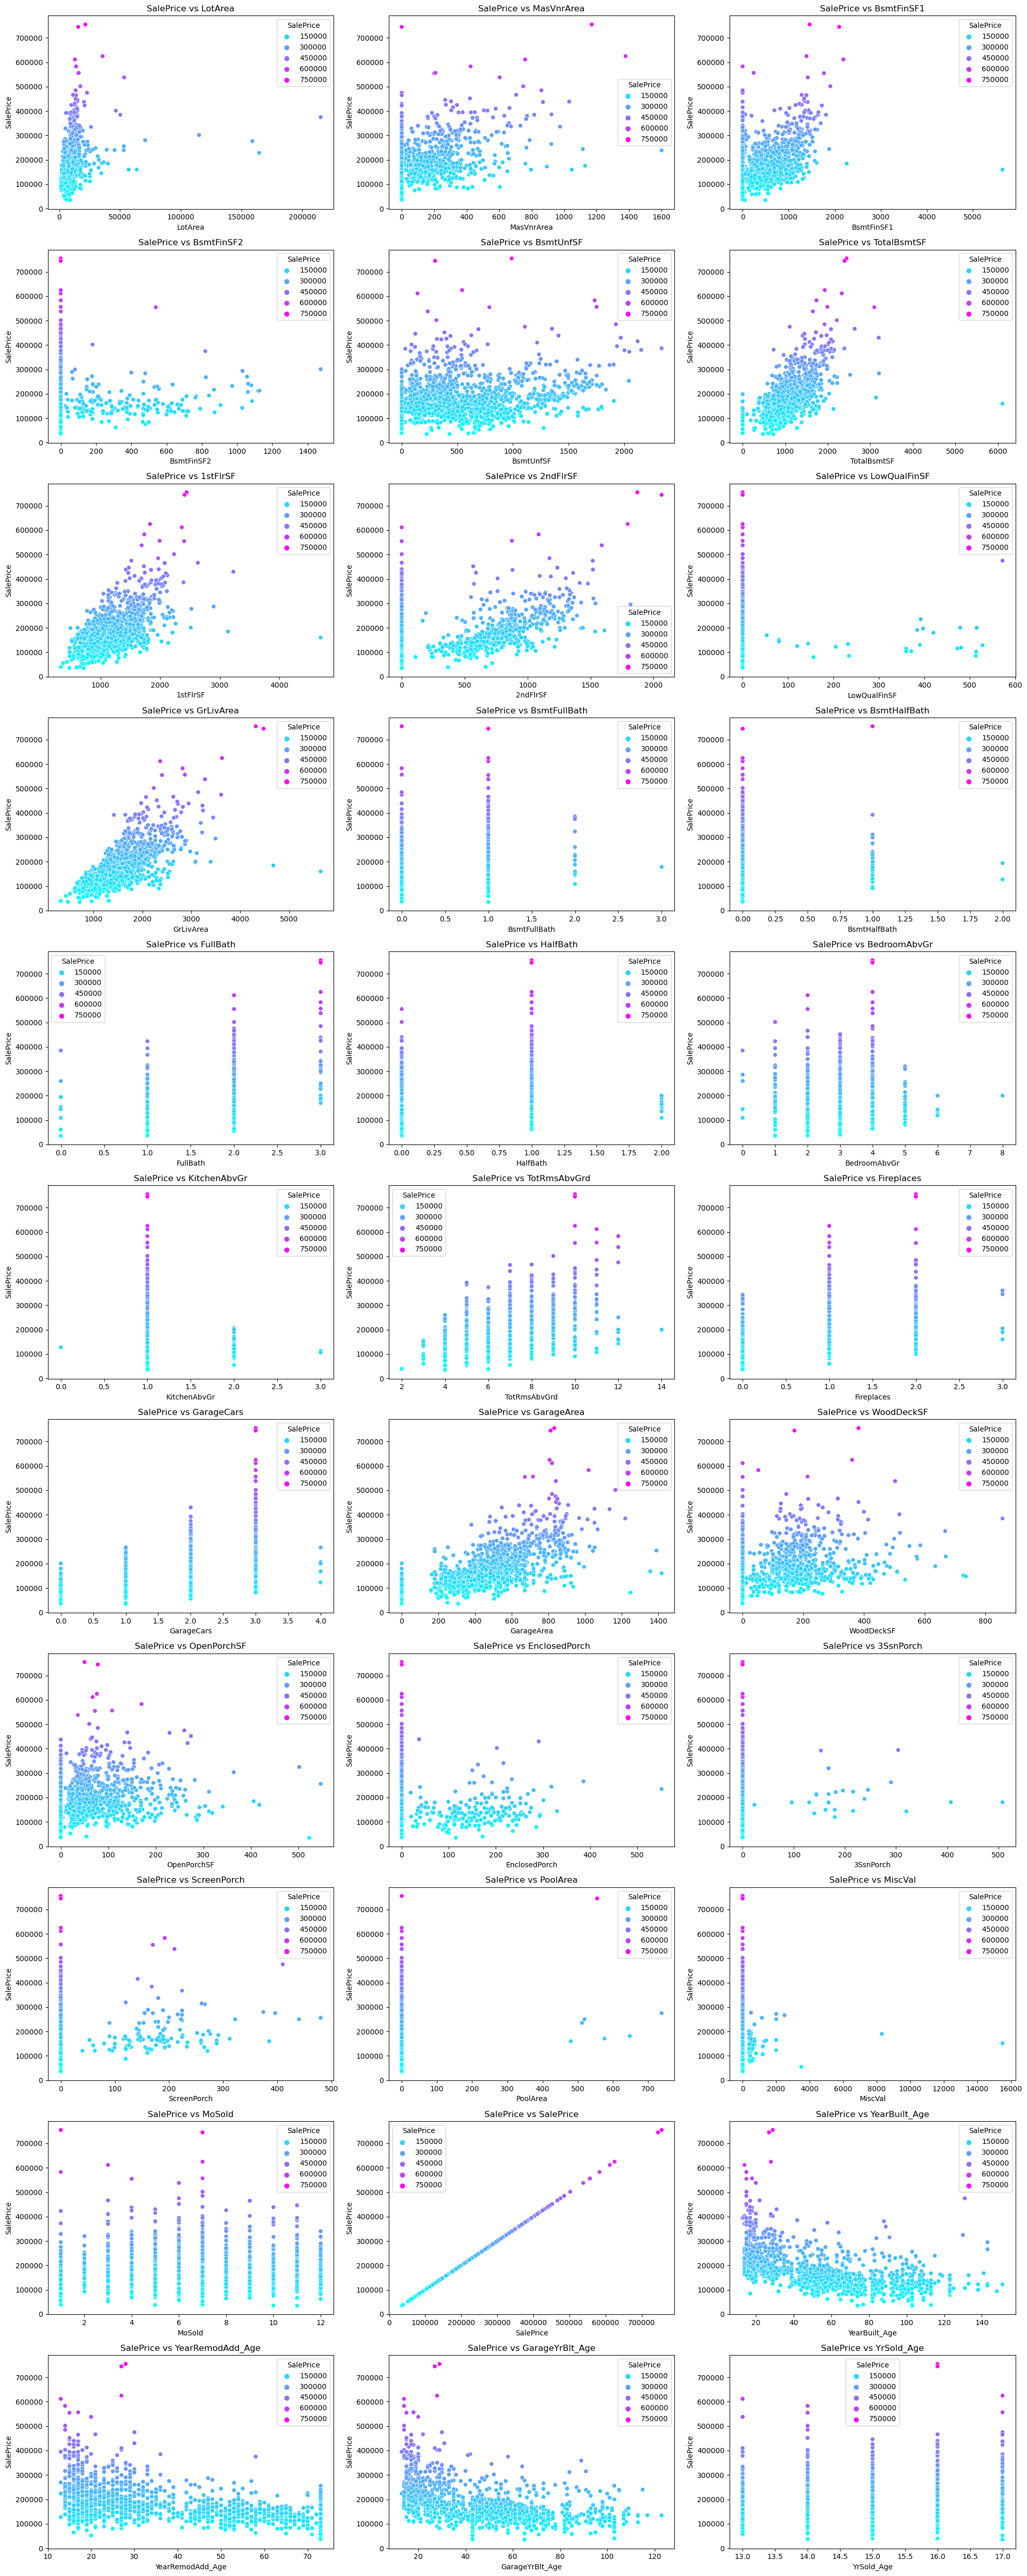

In [29]:
# Visualizing the numerical columns with the target variable

# Let's plot the scatter plot of numerical columns with the target variable
fig, axes = plt.subplots(11, 3, figsize=(20, 50))
for i, ax in enumerate(axes.flatten()):
    if i < len(num_cols):
        sns.scatterplot(x=num_cols[i], y='SalePrice', data=df, ax=ax, hue='SalePrice', palette='cool')
        plt.xlabel(num_cols[i])
        plt.ylabel('SalePrice')
        ax.set_title('SalePrice vs {}'.format(num_cols[i]))
        plt.tight_layout()

# Inference
# 1. The feature 'LotFrontage' is not linearly correlated with the target variable 'SalePrice'
# 2. The feature 'LotArea' is not linearly correlated with the target variable 'SalePrice'
# 3. The feature 'OverallQual' is linearly correlated with the target variable 'SalePrice'
# 4. The feature 'OverallCond' is not linearly correlated with the target variable 'SalePrice'
# 5. The feature 'YearBuilt' is linearly correlated with the target variable 'SalePrice'
# 6. The feature 'YearRemodAdd' is linearly correlated with the target variable 'SalePrice'
# 7. The feature 'MasVnrArea' is not linearly correlated with the target variable 'SalePrice'
# 8. The feature 'BsmtFinSF1' is not linearly correlated with the target variable 'SalePrice'
# 9. The feature 'BsmtFinSF2' is not linearly correlated with the target variable 'SalePrice'
# 10. The feature 'BsmtUnfSF' is not linearly correlated with the target variable 'SalePrice'
# 11. The feature 'TotalBsmtSF' is not linearly correlated with the target variable 'SalePrice'
# 12. The feature '1stFlrSF' is not linearly correlated with the target variable 'SalePrice'
# 13. The feature '2ndFlrSF' is not linearly correlated with the target variable 'SalePrice'
# 14. The feature 'LowQualFinSF' is not linearly correlated with the target variable 'SalePrice'
# 15. The feature 'GrLivArea' is not linearly correlated with the target variable 'SalePrice'
# 16. The feature 'BsmtFullBath' is not linearly correlated with the target variable 'SalePrice'
# 17. The feature 'BsmtHalfBath' is not linearly correlated with the target variable 'SalePrice'
# 18. The feature 'FullBath' is not linearly correlated with the target variable 'SalePrice'
# 19. The feature 'HalfBath' is not linearly correlated with the target variable 'SalePrice'
# 20. The feature 'BedroomAbvGr' is not linearly correlated with the target variable 'SalePrice'
# 21. The feature 'KitchenAbvGr' is not linearly correlated with the target variable 'SalePrice'
# 22. The feature 'TotRmsAbvGrd' is not linearly correlated with the target variable 'SalePrice'
# 23. The feature 'Fireplaces' is not linearly correlated with the target variable 'SalePrice'
# 24. The feature 'GarageYrBlt' is not linearly correlated with the target variable 'SalePrice'



In [30]:
# Visualizing the categorical columns with the target variable

# Let's plot the boxplot of categorical columns with the target variable
fig, axes = plt.subplots(11, 3, figsize=(20, 50))
for i, ax in enumerate(axes.flatten()):
    if i < len(cat_cols):
        sns.boxplot(x=cat_cols[i], y='SalePrice', data=df, ax=ax)
        plt.xlabel(cat_cols[i])
        plt.ylabel('SalePrice')
        ax.set_title('SalePrice vs {}'.format(cat_cols[i]))
        plt.tight_layout()
        

In [31]:
# Observations from the boxplot
# Paved alley access has higher median sale price than Gravel alley access
# Sale price of houses with regular lot shape is higher than the irregular lot shape
# Houses with land contour as Lvl has higher median sale price than other land contour
# Houses with good and excellent garage condition has higher median sale price than other garage condition

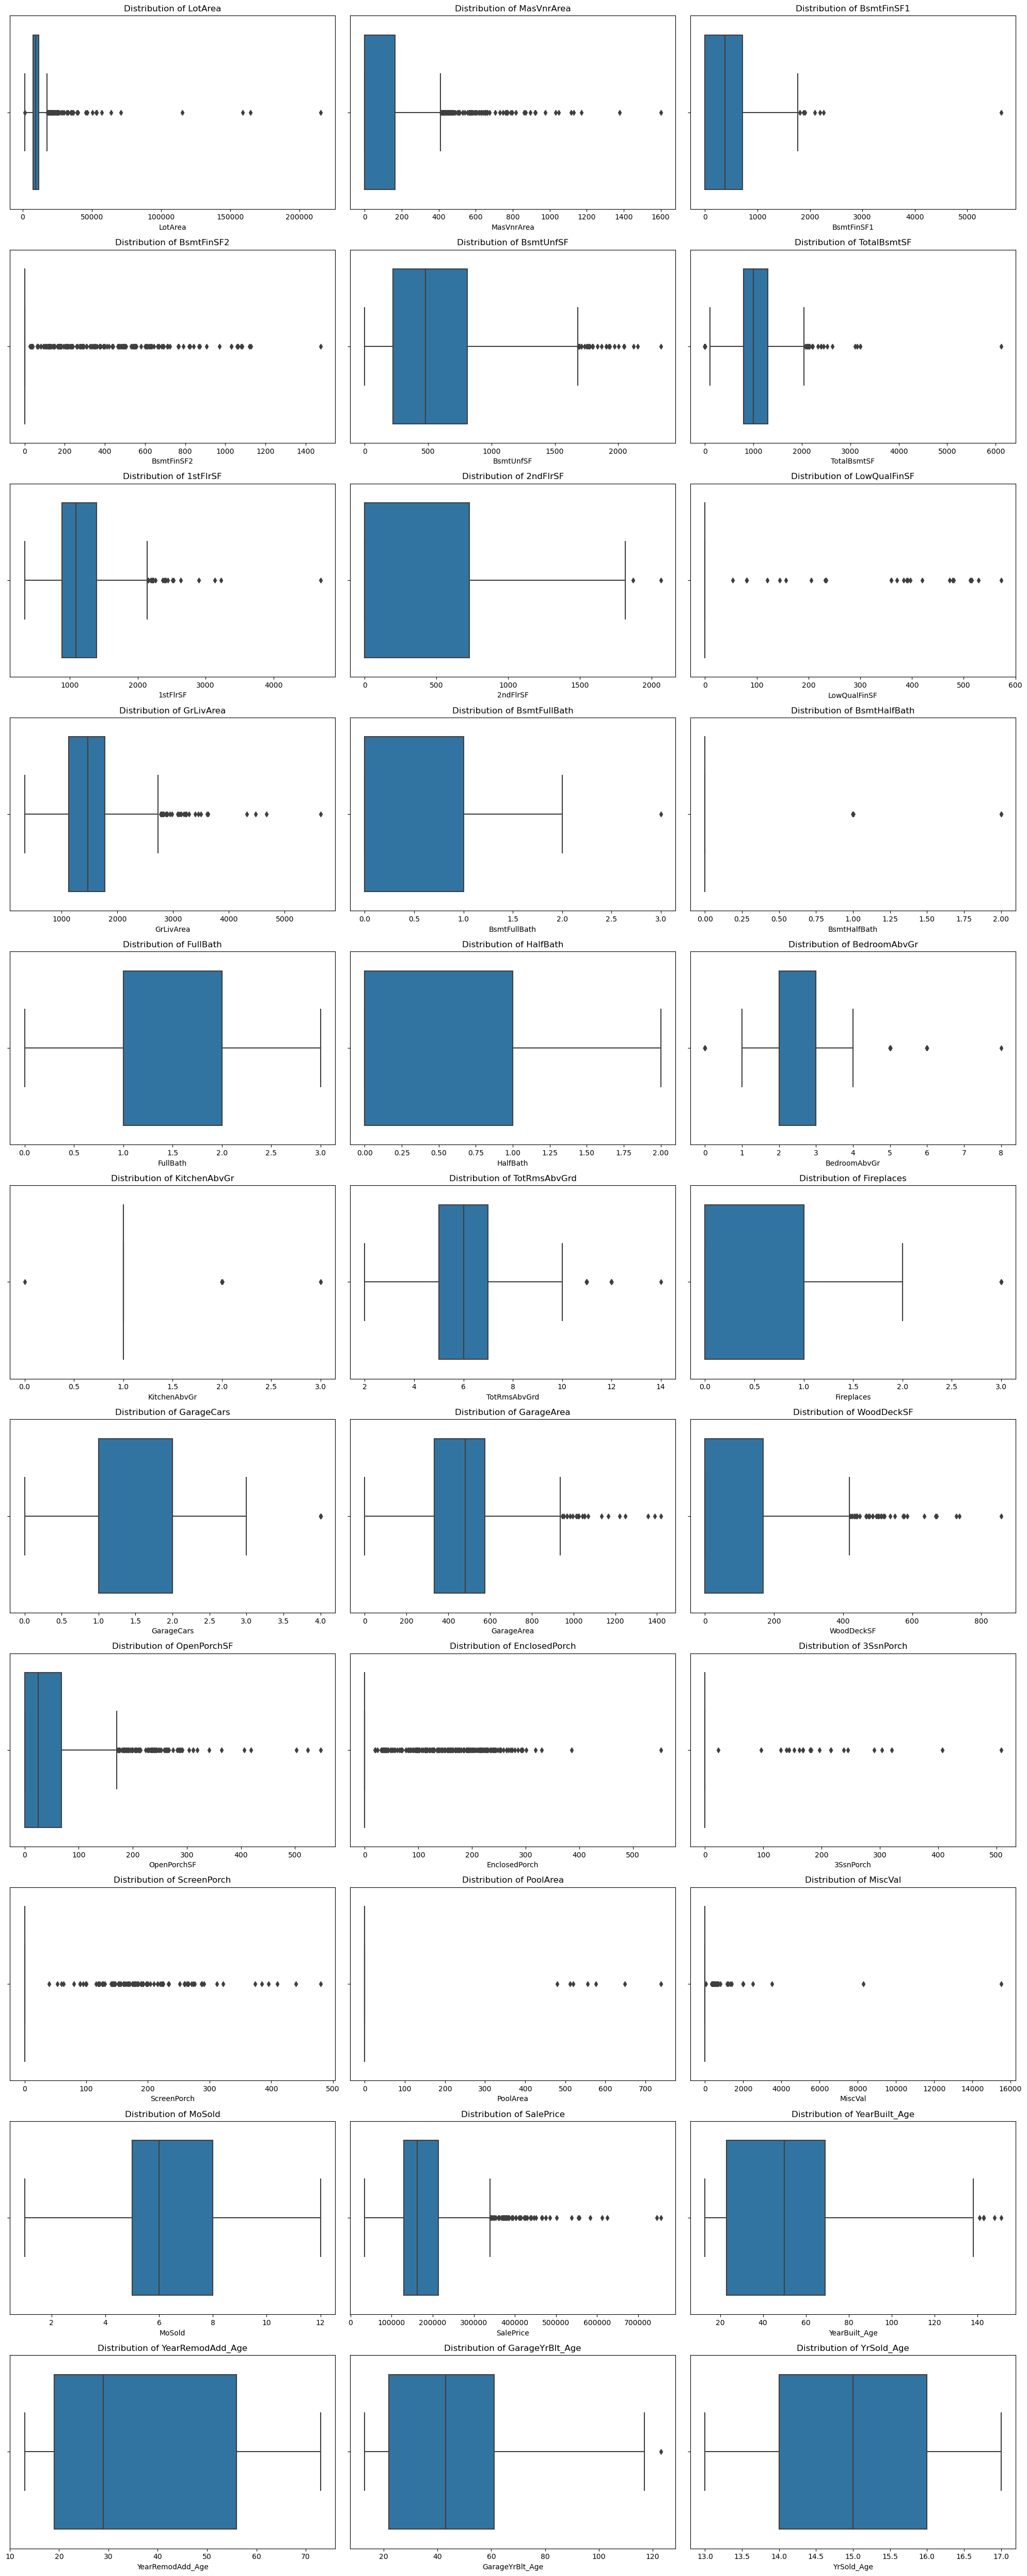

In [32]:
# outliers
# Let's check the outliers in the numerical columns
fig, axes = plt.subplots(11, 3, figsize=(20, 50))

for i, ax in enumerate(axes.flatten()):
    if i < len(num_cols):
        sns.boxplot(x=num_cols[i], data=df, ax=ax)
        plt.xlabel(num_cols[i])
        ax.set_title('Distribution of {}'.format(num_cols[i]))
        plt.tight_layout()
# Inference
# Certain columns have outliers and we will treat them in the next step

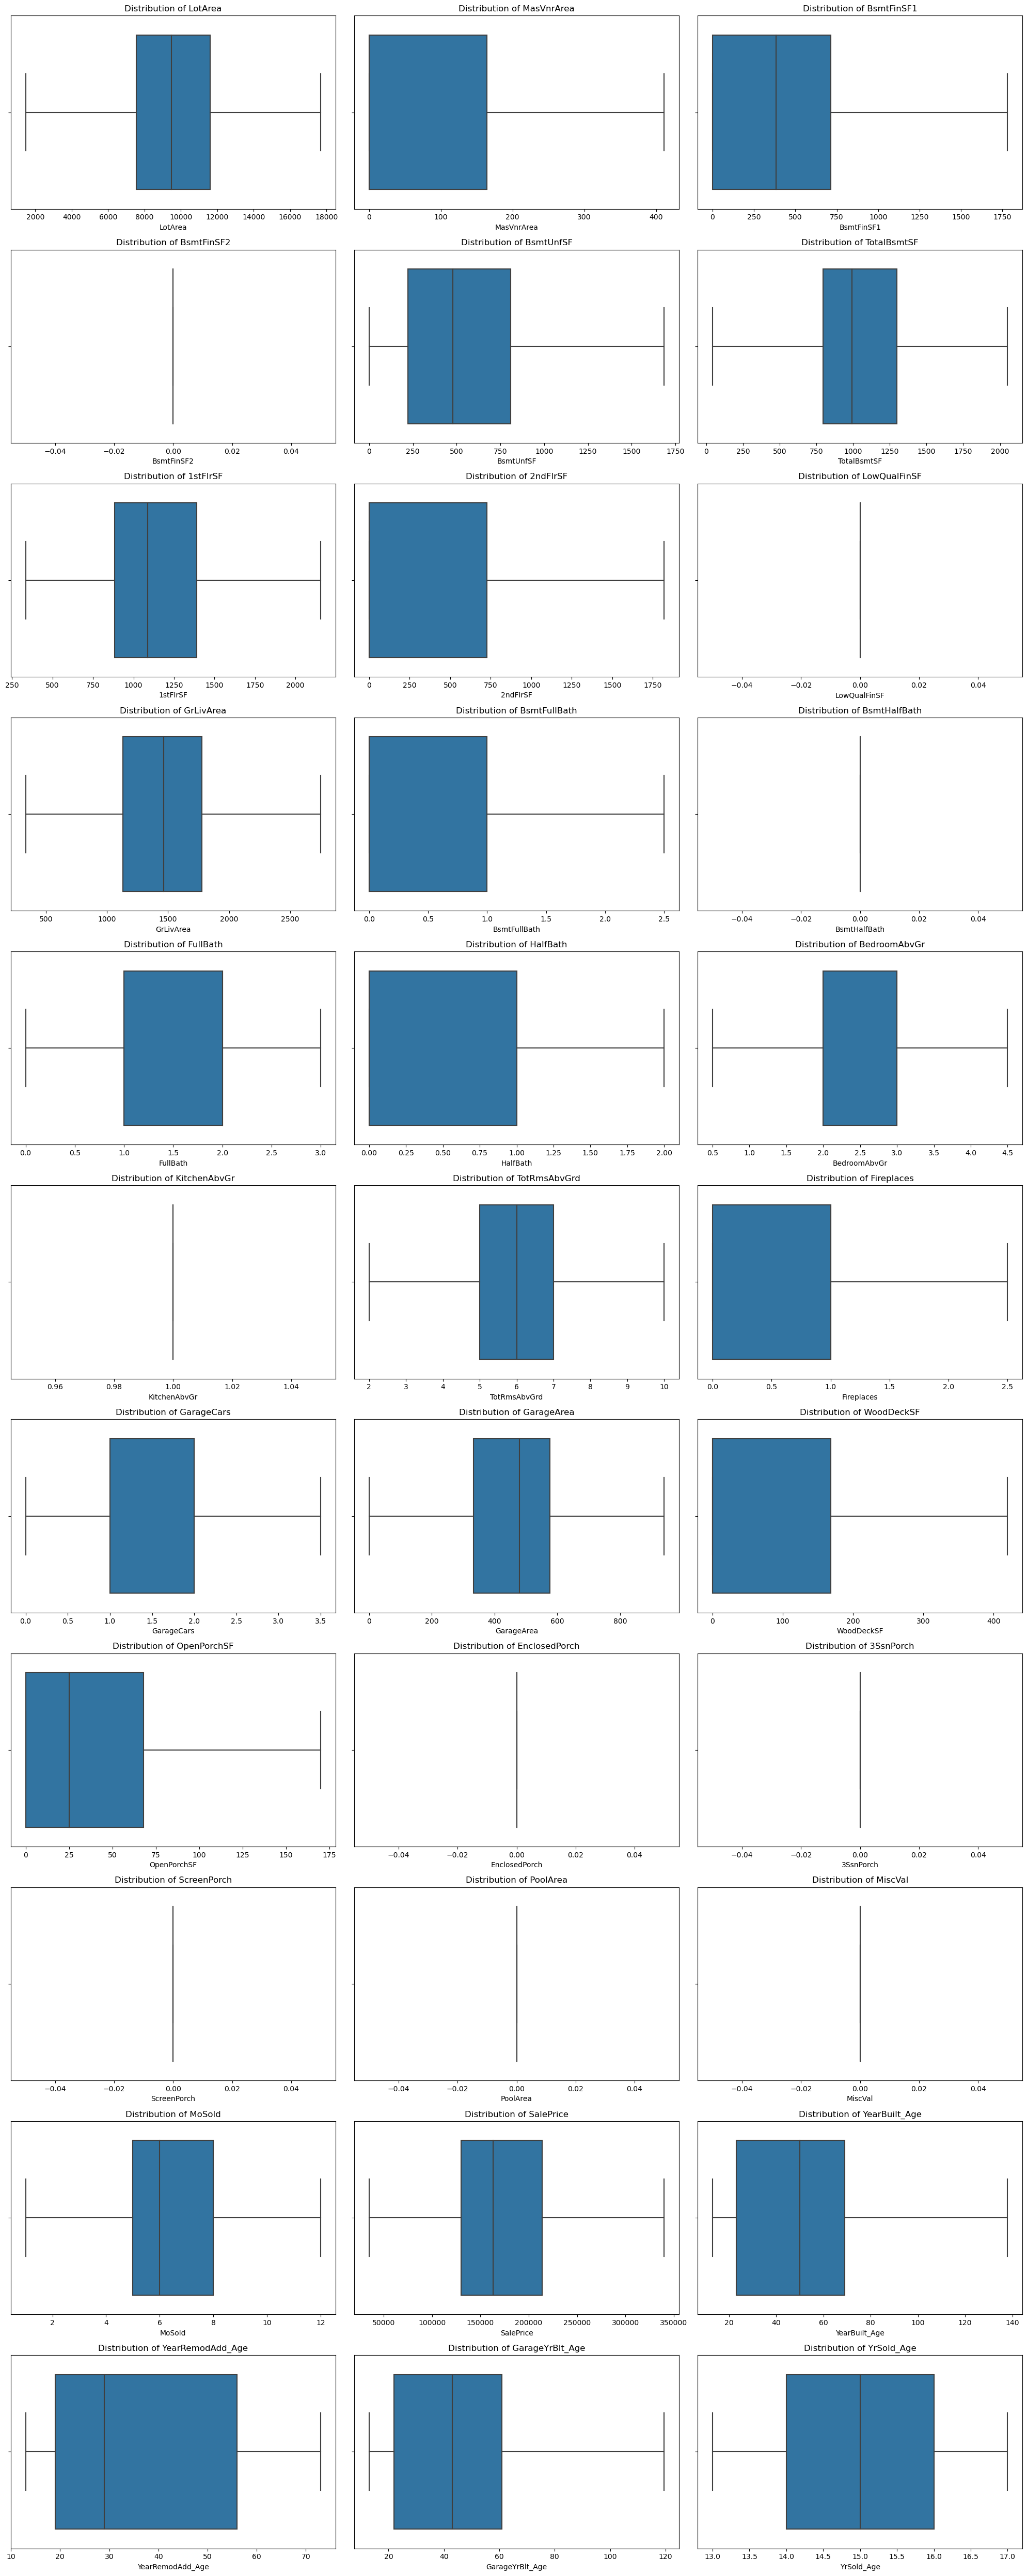

In [33]:
# Removing the outliers from the numerical columns
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range


for i in num_cols:
    lr, ur = remove_outliers(df[i])
    df[i] = np.where(df[i] > ur, ur, df[i])
    df[i] = np.where(df[i] < lr, lr, df[i])

# Let's check the outliers in the numerical columns again
fig, axes = plt.subplots(11, 3, figsize=(20, 50))

for i, ax in enumerate(axes.flatten()):
    if i < len(num_cols):
        sns.boxplot(x=num_cols[i], data=df, ax=ax)
        plt.xlabel(num_cols[i])
        ax.set_title('Distribution of {}'.format(num_cols[i]))
        plt.tight_layout()


In [34]:
df.shape

(1459, 80)

In [35]:
# get dummies for categorical columns
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)
df_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_No alley access  Alley_Pave  LotShape_IR2  LotShape_IR3  \
0                      1           0             0             0   
1                      1           0             0             0   
2                      1           0             0             0   
3                      1           0             0             0   
4                      1           0             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \

In [36]:
# Concatenate the dataframe with dummy variables & drop original columns
df=pd.concat([df,df_dummies],axis=1)
df= df.drop(cat_cols,axis=1) 

## 4. Model Building and Evaluation

In [37]:
# Preparing X and y
X = df.drop(['SalePrice','TransformedPrice'], axis=1)
y = df['TransformedPrice']
X.shape, y.shape

((1459, 286), (1459,))

In [38]:
num_cols.remove('SalePrice')

In [39]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.7, random_state=100)

In [40]:
# scaling the data
from sklearn.preprocessing import scale
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=286)

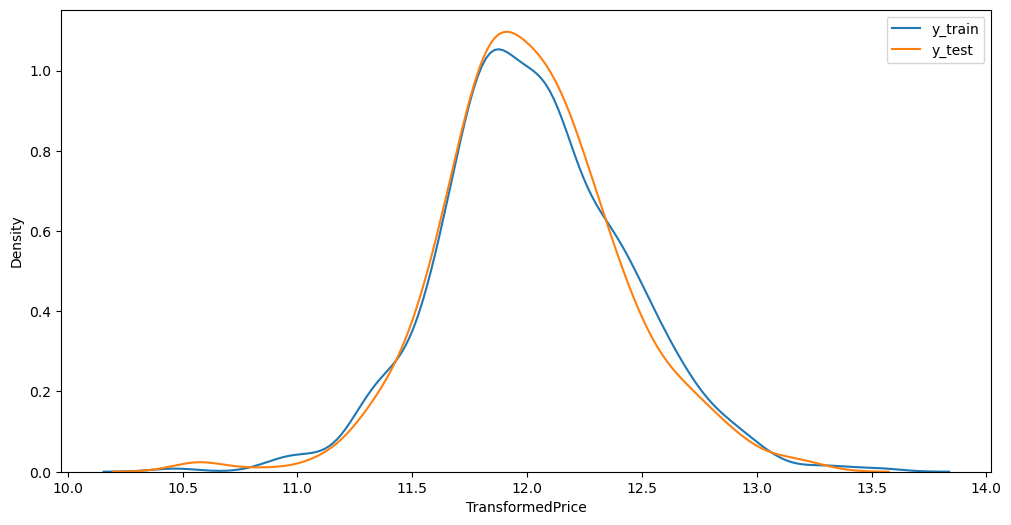

In [41]:
# Distribution of the target variable in train and test data
plt.figure(figsize=(12, 6))
sns.distplot(y_train, hist=False, label='y_train')
sns.distplot(y_test, hist=False, label='y_test')
plt.legend()
plt.show()
# Inference
# The distribution of the target variable in train and test data is almost similar

In [42]:
# use rfe to select top 50 features
from sklearn.feature_selection import RFE
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=300)
rfe.fit(X_train, y_train)

# Let's check the rfe support
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotArea', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', True, 1),
 ('YearBuilt_Age', True, 1),
 ('YearRemodAdd_Age', True, 1),
 ('GarageYrBlt_Age', True, 1),
 ('YrSold_Age', True, 1),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_

In [43]:
# columns selected by rfe
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=286)

In [44]:
X_train_rfe = X_train[rfe_cols]
X_test_rfe = X_test[rfe_cols]
#X_train_rfe = X_train
#X_test_rfe = X_test

In [45]:
# Unregularized Model
lr = LinearRegression()
lr.fit(X_train_rfe,y_train)
print("Training R2")
print(lr.score(X_train_rfe,y_train))
print("Testing R2")
print(lr.score(X_test_rfe,y_test))
# Inference
# The training R2 score is 0.95
# Invalid score error for testing R2 score


Training R2
0.9584504887957365
Testing R2
-94706014.37107936


#### **Model building using Ridge Regression**

In [46]:
# Ridge Regression
ridge = Ridge()
params = {'alpha': np.arange(0.01, 100, 0.1)}
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.000e-02, 1.100e-01, 2.100e-01, 3.100e-01, 4.100e-01, 5.100e-01,
       6.100e-01, 7.100e-01, 8.100e-01, 9.100e-01, 1.010e+00, 1.110e+00,
       1.210e+00, 1.310e+00, 1.410e+00, 1.510e+00, 1.610e+00, 1.710e+00,
       1.810e+00, 1.910e+00, 2.010e+00, 2.110e+00, 2.210e+00, 2.310e+00,
       2.410e+00, 2.510e+00, 2.610e+00, 2.710e+00, 2.810e+...
       9.721e+01, 9.731e+01, 9.741e+01, 9.751e+01, 9.761e+01, 9.771e+01,
       9.781e+01, 9.791e+01, 9.801e+01, 9.811e+01, 9.821e+01, 9.831e+01,
       9.841e+01, 9.851e+01, 9.861e+01, 9.871e+01, 9.881e+01, 9.891e+01,
       9.901e+01, 9.911e+01, 9.921e+01, 9.931e+01, 9.941e+01, 9.951e+01,
       9.961e+01, 9.971e+01, 9.981e+01, 9.991e+01])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# preparing the dataframe of cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.015124      0.002555         0.002659        0.003262        0.01   
1       0.012149      0.004633         0.003888        0.007165        0.11   
2       0.015911      0.002367         0.003004        0.003270        0.21   
3       0.020070      0.004619         0.006589        0.005719        0.31   
4       0.007923      0.006463         0.012602        0.008399        0.41   

                           params  split0_test_score  split1_test_score  \
0                 {'alpha': 0.01}          -0.084024          -0.095307   
1                 {'alpha': 0.11}          -0.082529          -0.091641   
2  {'alpha': 0.21000000000000002}          -0.081651          -0.089623   
3  {'alpha': 0.31000000000000005}          -0.081244          -0.088782   
4  {'alpha': 0.41000000000000003}          -0.080996          -0.088170   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0          -0.102503          -0.095585          -0.088720        -0.093228   
1          -0.099528          -0.092694          -0.087029        -0.090684   
2          -0.098599          -0.091342          -0.086472        -0.089537   
3          -0.097979          -0.090525          -0.086179        -0.088942   
4          -0.097500          -0.089915          -0.085965        -0.088509   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.006339             1000           -0.057342           -0.053746   
1        0.005710              751           -0.058111           -0.054273   
2        0.005603              601           -0.058706           -0.054893   
3        0.005497              535           -0.059187           -0.055469   
4        0.005401              490           -0.059597           -0.056003   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.050861           -0.056248           -0.055906   
1           -0.051542           -0.056582           -0.056549   
2           -0.052221           -0.056866           -0.057149   
3           -0.052787           -0.057160           -0.057666   
4           -0.053335           -0.057491           -0.058158   

   mean_train_score  std_train_score  
0         -0.054821         0.002298  
1         -0.055411         0.002290  
2         -0.055967         0.002231  
3         -0.056454         0.002184  
4         -0.056917         0.002132

In [48]:
print(model_cv.best_params_)

{'alpha': 10.21}


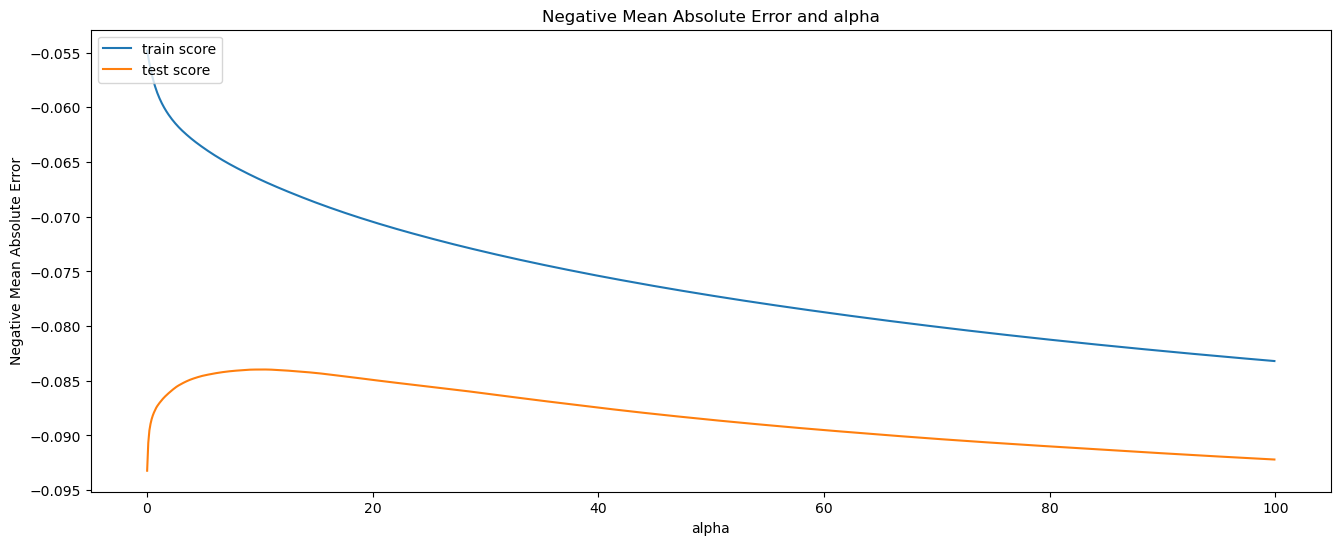

In [49]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16, 6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [50]:
# Let's check the mean test score for alpha=10.21
cv_results[cv_results['param_alpha']==10.21]
# Inference
# The mean test score for alpha=10.21 is -0.083969

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
102       0.007166      0.004398         0.001219        0.001263   

     param_alpha            params  split0_test_score  split1_test_score  \
102        10.21  {'alpha': 10.21}          -0.074646           -0.08321   

     split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
102          -0.096855          -0.083786          -0.081348        -0.083969   

     std_test_score  rank_test_score  split0_train_score  split1_train_score  \
102        0.007217                1           -0.069896           -0.067213   

     split2_train_score  split3_train_score  split4_train_score  \
102           -0.062506           -0.066471           -0.067367   

     mean_train_score  std_train_score  
102         -0.066691          0.00239

In [51]:
# Fitting the model with alpha=10.21
alpha = 10.21
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 8.32101635e-06,  6.01058712e-06, -3.24304586e-06,  0.00000000e+00,
       -7.66650453e-05,  2.15229054e-04,  5.31518440e-05,  1.20445954e-04,
        0.00000000e+00,  2.05244156e-04,  1.00026733e-02,  0.00000000e+00,
        2.33068128e-02,  1.38073223e-02, -1.14754278e-03,  0.00000000e+00,
       -1.77445725e-03,  1.73640073e-02,  2.49477136e-02,  6.60824889e-05,
        8.05007137e-05,  1.33891705e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -6.83819182e-04,
       -1.99218884e-03, -1.48114405e-03,  2.44709489e-04,  3.70388568e-03,
       -4.44813852e-02, -1.06178036e-02,  1.31043747e-02,  9.49891387e-03,
       -2.07410920e-02,  5.38174691e-02,  1.03283622e-02, -1.09790232e-03,
        1.15293367e-02, -1.92313122e-02,  5.47806885e-03, -4.76613937e-02,
       -1.93071912e-02, -1.60386208e-02,  6.58811205e-02,  4.29808841e-02,
        5.82619157e-02,  3.20756559e-02,  2.44672691e-02,  1.00240175e-03,
        2.76150398e-02,  

In [52]:
# Ridge Regression Model Evaluation
y_train_pred = ridge.predict(X_train_rfe)
print('R2 score of train data:', r2_score(y_train, y_train_pred))
print('RMSE of train data:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE of train data:', mean_squared_error(y_train, y_train_pred))

y_test_pred = ridge.predict(X_test_rfe)
print('R2 score of test data:', r2_score(y_test, y_test_pred))
print('RMSE of test data:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE of test data:', mean_squared_error(y_test, y_test_pred))

R2 score of train data: 0.9372384215314642
RMSE of train data: 0.10125896230814176
MSE of train data: 0.010253377447721673
R2 score of test data: 0.8802197544147128
RMSE of test data: 0.13426863481946494
MSE of test data: 0.01802806629628283


#### **Inference**
**The R2 score of train data is 0.937**

**The RMSE of train data is 0.101**

**The MAE of train data is 0.0102**

**The R2 score of test data is 0.88**

**The RMSE of test data is 0.134**

**The MAE of test data is 0.018**

In [53]:
# create dataframe for coefficients
ridge_coeff = pd.DataFrame({'Features': X_train_rfe.columns, 'Coefficient': ridge.coef_.round(4), 'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})
ridge_coeff = ridge_coeff.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_coeff.head(10)

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
126         OverallCond_3      -0.1045                            0.1045
123         OverallQual_9       0.0856                            0.0856
71   Neighborhood_Crawfor       0.0831                            0.0831
263             PoolQC_Gd      -0.0816                            0.0816
235        Functional_Typ       0.0810                            0.0810
222          CentralAir_Y       0.0731                            0.0731
75   Neighborhood_MeadowV      -0.0715                            0.0715
147   Exterior1st_BrkFace       0.0705                            0.0705
72   Neighborhood_Edwards      -0.0685                            0.0685
46            MSZoning_FV       0.0659                            0.0659

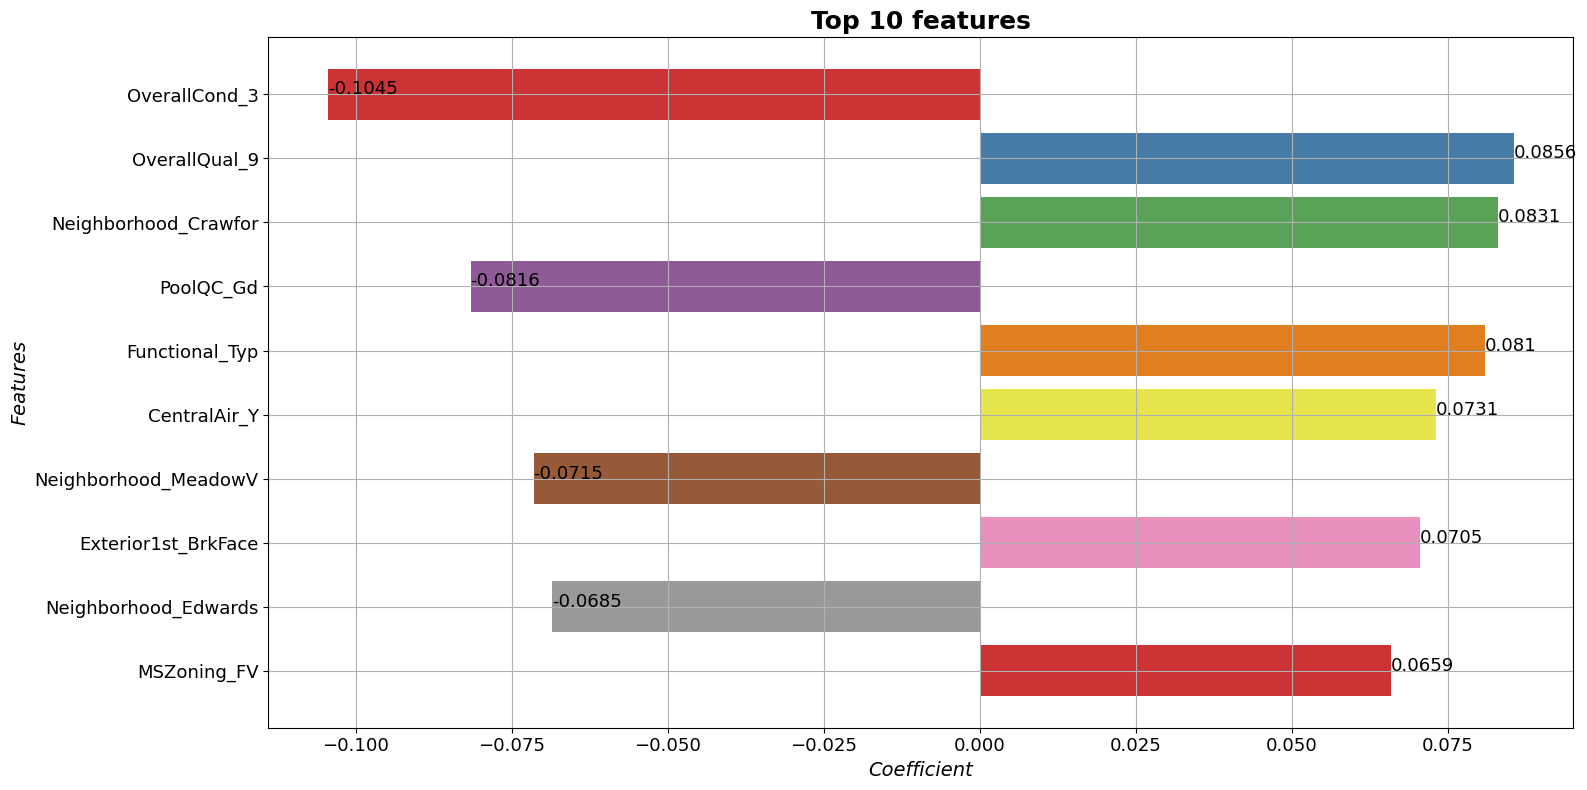

In [54]:
# coefficient plot top 10 - horizontal bar plot
top_features = ridge_coeff.head(10)
plt.figure(figsize=(16,8))
#sns.barplot(x='Coefficient', y='Features', data=top_features, palette='Set1' )
ax3= sns.barplot(x='Coefficient', y='Features', data=top_features, palette='Set1')
plt.title('Top 10 features', fontsize=18, fontweight='bold')
plt.xlabel('Coefficient', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
coef= top_features['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

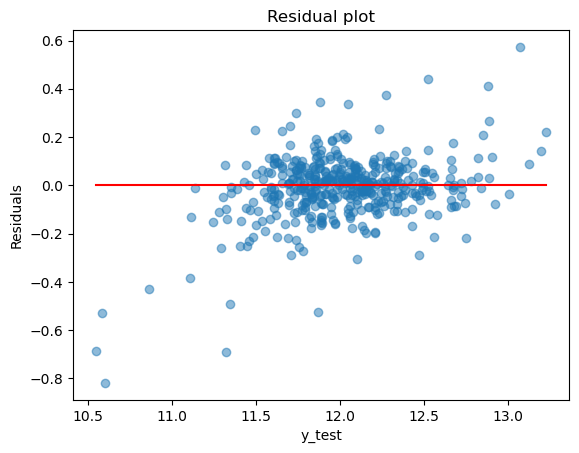

In [55]:
# residual plot
residuals = y_test - y_test_pred
sns.regplot(x=y_test, y=residuals, fit_reg=False, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, lowess=True)
sns.lineplot(x=y_test, y=0, color='red')
plt.xlabel('y_test')
plt.ylabel('Residuals')
plt.title("Residual plot")
plt.show()

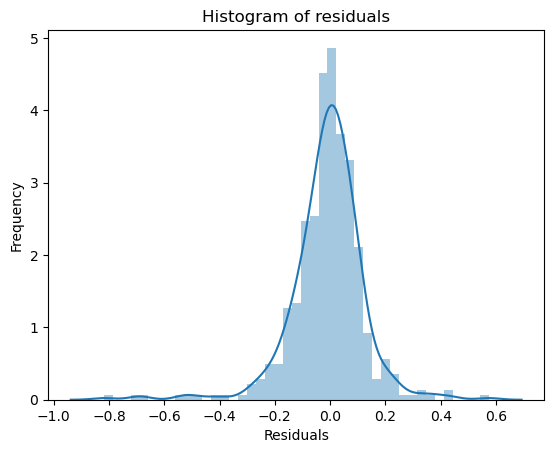

In [56]:
# Histogram of residuals
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title("Histogram of residuals")
plt.show()

### **Summary of Ridge Regression**:
##### The top 5 predicor variables obtained are:
**OverallCond_3: Overall quality condition being Fair. (Negatively correlated)**

**OverallQual_9: Overall quality being Excellent. (Positively correlated)**

**Neighborhood_Crawfor: Physical location Crawford. (Positively correlated)**

**PoolQC_Gd: Good Pool Quality. (Negatively correlated)**

**Functional_Typ: Typical Functionality. (Positively correlated)**

#### **Model building using Lasso Regression**

In [57]:
# lasso regression
# Note, for Lasso we have reduced the range for Alpha as it reduces coefficient value to 0 as we increase
# and we do not want over-penalization.
lasso = Lasso()
params = {'alpha': np.arange(0.001, 1, 0.001)}
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.0...
       0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952, 0.953, 0.954,
       0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962, 0.963,
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999])},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
print(model_cv.best_estimator_)

Lasso(alpha=0.001)


In [59]:
alpha=0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_rfe, y_train)
lasso.coef_

array([ 7.56793276e-06,  2.74916472e-05,  3.86175315e-05,  0.00000000e+00,
       -4.61420901e-05,  2.06707847e-04,  6.30934245e-05,  1.31723452e-04,
        0.00000000e+00,  2.03560635e-04,  1.74830249e-03,  0.00000000e+00,
        5.17895537e-03,  0.00000000e+00, -1.07507839e-03,  0.00000000e+00,
       -3.47992538e-04,  2.45945540e-02,  1.96611095e-02,  1.05118065e-04,
        9.22548319e-05,  1.44905814e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.46115309e-04,
       -2.39889308e-03, -1.72237185e-03,  3.09397977e-04,  2.78298272e-03,
       -3.64706771e-02, -0.00000000e+00,  0.00000000e+00,  4.23879858e-03,
       -0.00000000e+00,  4.27265363e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.67202176e-03,  0.00000000e+00, -2.25555842e-02,
       -0.00000000e+00, -0.00000000e+00,  4.34722754e-02,  0.00000000e+00,
        4.12371021e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [60]:
# Lasso Regression Model Evaluation
y_train_pred = lasso.predict(X_train_rfe)
print('R2 score of train data:', r2_score(y_train, y_train_pred))
print('RMSE of train data:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE of train data:', mean_squared_error(y_train, y_train_pred))

y_test_pred = lasso.predict(X_test_rfe)
print('R2 score of test data:', r2_score(y_test, y_test_pred))
print('RMSE of test data:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE of test data:', mean_squared_error(y_test, y_test_pred))

R2 score of train data: 0.9212413515095588
RMSE of train data: 0.11343202131809234
MSE of train data: 0.012866823460308156
R2 score of test data: 0.8748317254458482
RMSE of test data: 0.13725529463885458
MSE of test data: 0.018839015906398783


#### **Inference**
**The R2 score of train data through lasso regression is 0.921**

**The RMSE of train data through lasso regression is 0.113**

**The MAE of train data through lasso regression is 0.0128**

**The R2 score of test data through lasso regression is 0.874**

**The RMSE of test data through lasso regression is 0.137**

**The MAE of test data through lasso regression is 0.019**

In [61]:
# create dataframe for coefficients
lasso_coeff = pd.DataFrame({'Features': X_train_rfe.columns, 'Coefficient': lasso.coef_.round(4), 'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
lasso_coeff = lasso_coeff.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_coeff.head(10)

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
126         OverallCond_3      -0.1550                            0.1550
123         OverallQual_9       0.1182                            0.1182
71   Neighborhood_Crawfor       0.0936                            0.0936
127         OverallCond_4      -0.0878                            0.0878
222          CentralAir_Y       0.0855                            0.0855
235        Functional_Typ       0.0813                            0.0813
75   Neighborhood_MeadowV      -0.0760                            0.0760
147   Exterior1st_BrkFace       0.0742                            0.0742
122         OverallQual_8       0.0578                            0.0578
81   Neighborhood_NridgHt       0.0564                            0.0564

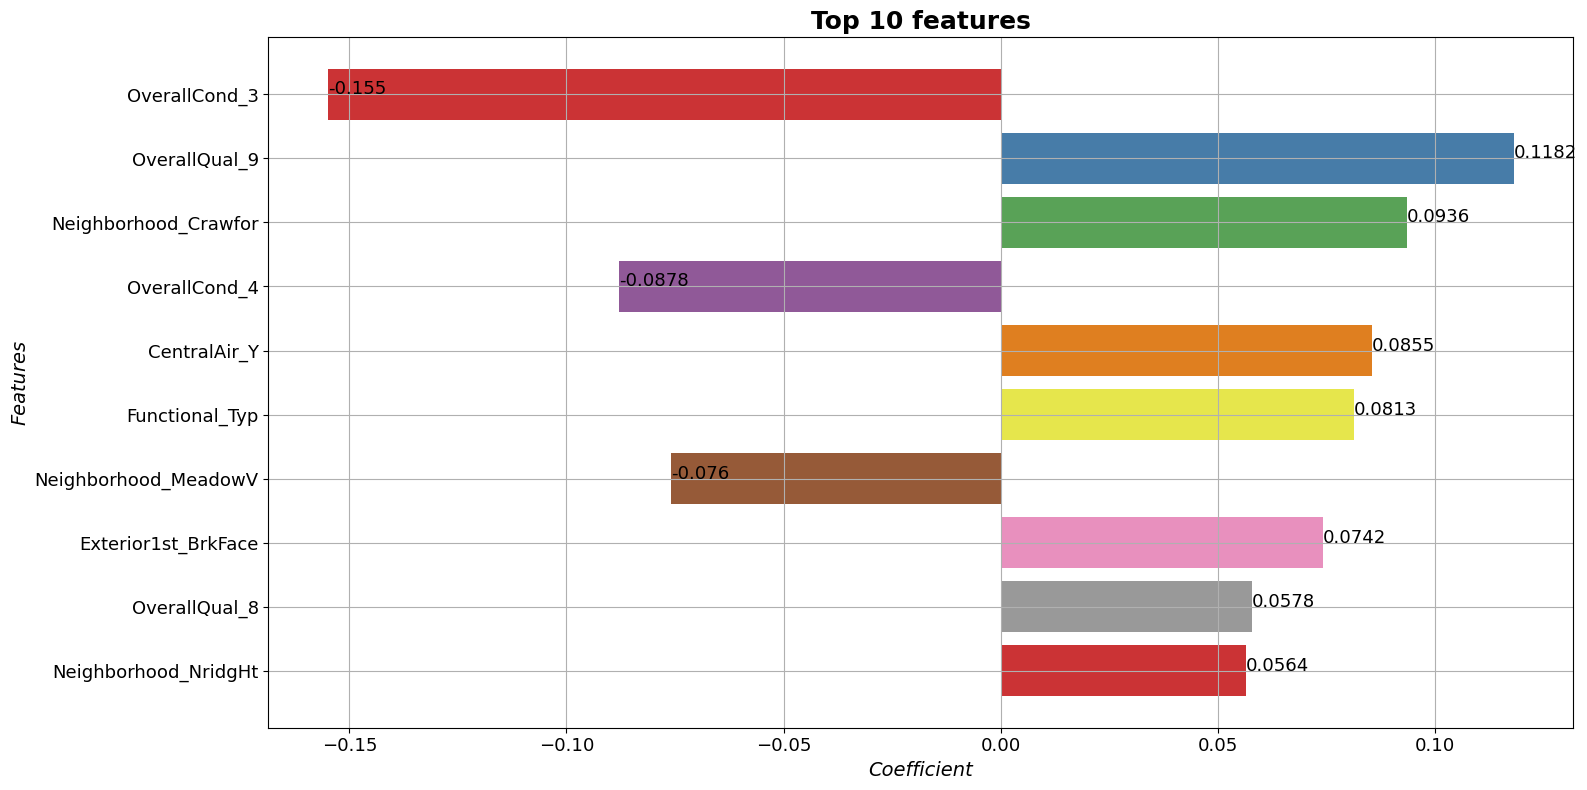

In [62]:
# coefficient plot top 10
top_features = lasso_coeff.head(10)
plt.figure(figsize=(16,8))
#sns.barplot(x='Coefficient', y='Features', data=top_features, palette='Set1' )
ax3= sns.barplot(x='Coefficient', y='Features', data=top_features, palette='Set1')
plt.title('Top 10 features', fontsize=18, fontweight='bold')
plt.xlabel('Coefficient', fontsize=14, fontstyle='italic')
plt.ylabel('Features', fontsize=14, fontstyle='italic')
coef= top_features['Coefficient'] #Storing coefficient values
for index, value in enumerate(coef):
    plt.text(value, index, str(value), fontsize=13)
plt.grid(True)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.autoscale()
plt.tight_layout()
plt.show()

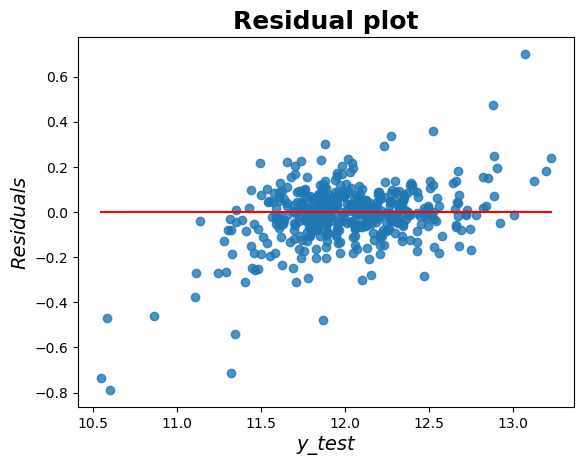

In [63]:
# residual plot
residuals = y_test - y_test_pred

sns.regplot(x=y_test, y=residuals, fit_reg=False)
sns.lineplot(x=y_test, y=0, color='red')
plt.xlabel('y_test', fontsize=14, fontstyle='italic')
plt.ylabel('Residuals', fontsize=14, fontstyle='italic')
plt.title("Residual plot", fontsize=18, fontweight='bold')
plt.show()

### **Summary of Lasso Regression**:
The top 5 predicor variables obtained are:
**OverallCond_3: Overall quality condition being Fair. (Negatively correlated)**

**OverallQual_9: Overall quality being Excellent. (Positively correlated)**

**Neighborhood_Crawfor: Physical location Crawford. (Positively correlated)**

**OverallCond_4: Overall quality condition Below Average. (Negatively correlated)**

**CentralAir_Y: Central air conditioning needed. (Positively correlated)**

## 5. Summary
After comparing both the Ridge and Lasso regularization models we can see that the below features are best explaining the Dataset (combining Ridge & Lasso):
**OverallCond_3: Overall quality condition being Fair. (Negatively correlated)**

**OverallQual_9: Overall quality being Excellent. (Positively correlated)**

**Neighborhood_Crawfor: Physical location Crawford. (Positively correlated)**

**OverallCond_4: Overall quality condition Below Average. (Negatively correlated)**

**PoolQC_Gd: Good Pool Quality. (Negatively correlated)**

**Functional_Typ: Typical Functionality. (Positively correlated)**

**CentralAir_Y: Central air conditioning needed. (Positively correlated)**

Optimal alpha value for Ridge: 10.21.

Optimal alpha value for Lasso: 0.001.

**Since we have too many preditor variables, we would use Lasso Regression as reduces the coefficients of predictor variables to 0 there by doing an automatic feature selection.**

### **Subjective Question1**
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [64]:
# Fitting the model with alpha=10.21
alpha = 10.21
# double the alpha
alpha = alpha * 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 8.37992325e-06,  2.14338384e-05,  3.46064006e-06,  0.00000000e+00,
       -7.50101044e-05,  2.24946603e-04,  5.12763409e-05,  1.16154637e-04,
        0.00000000e+00,  2.13087949e-04,  6.87685440e-03,  0.00000000e+00,
        2.05792090e-02,  1.20076165e-02, -2.05706627e-03,  0.00000000e+00,
       -2.12451270e-03,  2.02490273e-02,  2.45575604e-02,  7.08479227e-05,
        8.19178051e-05,  1.33384742e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.65036955e-04,
       -2.01095334e-03, -1.66531512e-03,  2.53765561e-04,  3.76117761e-03,
       -3.90037795e-02, -4.63246765e-03,  1.10628384e-02,  1.02178437e-02,
       -1.86223210e-02,  4.64804699e-02,  4.82147193e-03,  2.00254233e-03,
        8.71866931e-03, -1.64201650e-02,  6.86832744e-03, -3.79924228e-02,
       -1.32436112e-02, -1.30558774e-02,  4.49373705e-02,  2.17451115e-02,
        4.15870731e-02,  6.41187110e-03,  1.82195806e-02,  8.50651426e-04,
        2.07075007e-02,  

In [65]:
# Ridge Regression Model Evaluation
y_train_pred = ridge.predict(X_train_rfe)
print('R2 score of train data:', r2_score(y_train, y_train_pred))
print('RMSE of train data:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MAE of train data:', mean_squared_error(y_train, y_train_pred))

y_test_pred = ridge.predict(X_test_rfe)
print('R2 score of test data:', r2_score(y_test, y_test_pred))
print('RMSE of test data:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MAE of test data:', mean_squared_error(y_test, y_test_pred))

R2 score of train data: 0.9303370373667955
RMSE of train data: 0.10668110703901111
MAE of train data: 0.011380858599068946
R2 score of test data: 0.877137681990487
RMSE of test data: 0.13598510033250516
MAE of test data: 0.018491947512441494


In [66]:
# Dataframe for coefficients
ridge_coeff = pd.DataFrame({'Features': X_train_rfe.columns, 'Coefficient': ridge.coef_.round(4), 'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge.coef_.round(4))})
ridge_coeff = ridge_coeff.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_coeff.head(10)

Features  Coefficient  Abs_Coefficient_Ridge(Desc_Sort)
126         OverallCond_3      -0.0782                            0.0782
235        Functional_Typ       0.0706                            0.0706
71   Neighborhood_Crawfor       0.0686                            0.0686
123         OverallQual_9       0.0667                            0.0667
222          CentralAir_Y       0.0658                            0.0658
72   Neighborhood_Edwards      -0.0611                            0.0611
127         OverallCond_4      -0.0574                            0.0574
130         OverallCond_7       0.0564                            0.0564
147   Exterior1st_BrkFace       0.0564                            0.0564
131         OverallCond_8       0.0511                            0.0511

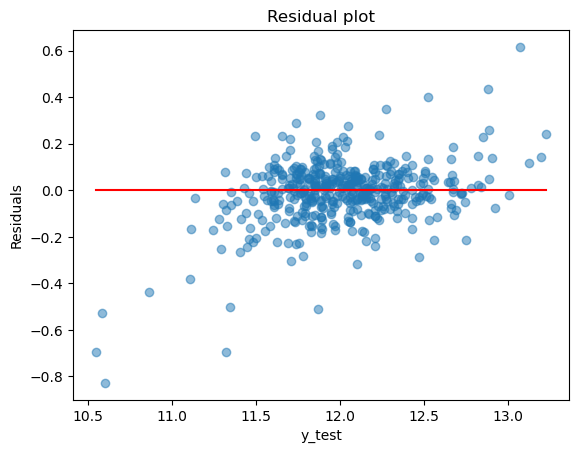

In [67]:
# residual plot
residuals = y_test - y_test_pred
sns.regplot(x=y_test, y=residuals, fit_reg=False, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, lowess=True)
sns.lineplot(x=y_test, y=0, color='red')
plt.xlabel('y_test')
plt.ylabel('Residuals')
plt.title("Residual plot")
plt.show()

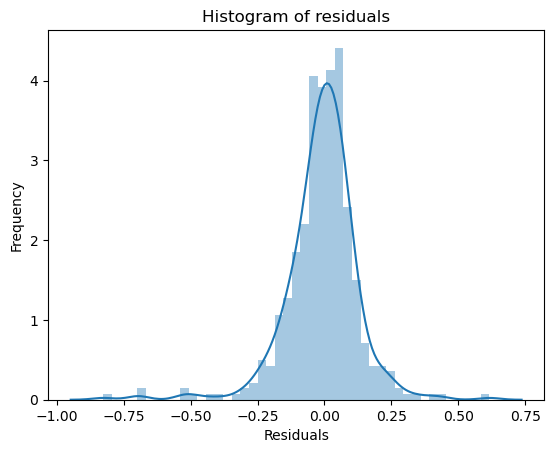

In [68]:
# Histogram of residuals
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title("Histogram of residuals")
plt.show()

In [69]:
alpha=0.001
# double the alpha
alpha = alpha * 2
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_rfe, y_train)
lasso.coef_

array([ 8.44769149e-06,  3.14776008e-05,  4.96365548e-05,  0.00000000e+00,
       -4.26744381e-05,  2.15929922e-04,  7.36966944e-05,  1.22907657e-04,
        0.00000000e+00,  2.11607222e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.54779410e-03,  0.00000000e+00,
       -1.70152375e-03,  2.70011849e-02,  1.20441781e-02,  1.58960578e-04,
        9.29475982e-05,  1.51189418e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.48011741e-03, -2.09922611e-03,  3.56757962e-04,  2.17309103e-03,
       -2.12856620e-02, -0.00000000e+00,  0.00000000e+00,  6.29748976e-04,
       -0.00000000e+00,  1.34152904e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -5.08469840e-05,
       -0.00000000e+00, -0.00000000e+00,  1.40697818e-02,  0.00000000e+00,
        3.94568550e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [70]:
# lasso Regression Model Evaluation
y_train_pred = lasso.predict(X_train_rfe)
print('R2 score of train data:', r2_score(y_train, y_train_pred))
print('RMSE of train data:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE of train data:', mean_squared_error(y_train, y_train_pred))

y_test_pred = lasso.predict(X_test_rfe)
print('R2 score of test data:', r2_score(y_test, y_test_pred))
print('RMSE of test data:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE of test data:', mean_squared_error(y_test, y_test_pred))


R2 score of train data: 0.9050246565684178
RMSE of train data: 0.12456383769073949
MSE of train data: 0.015516149660244893
R2 score of test data: 0.8601026161101185
RMSE of test data: 0.14510646768146723
MSE of test data: 0.021055886962992695


In [71]:
# create dataframe for coefficients
lasso_coeff = pd.DataFrame({'Features': X_train_rfe.columns, 'Coefficient': lasso.coef_.round(4), 'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
lasso_coeff = lasso_coeff.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_coeff.head(10)

Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
126         OverallCond_3      -0.0911                            0.0911
123         OverallQual_9       0.0856                            0.0856
222          CentralAir_Y       0.0788                            0.0788
71   Neighborhood_Crawfor       0.0745                            0.0745
235        Functional_Typ       0.0731                            0.0731
127         OverallCond_4      -0.0721                            0.0721
72   Neighborhood_Edwards      -0.0447                            0.0447
91        Condition1_Norm       0.0443                            0.0443
122         OverallQual_8       0.0408                            0.0408
147   Exterior1st_BrkFace       0.0397                            0.0397

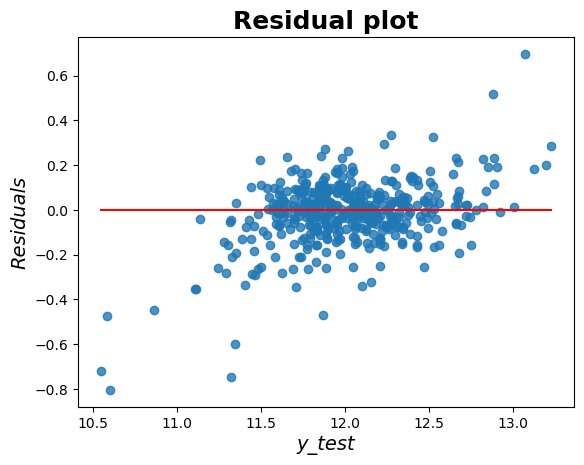

In [72]:
# Residual plot
residuals = y_test - y_test_pred

sns.regplot(x=y_test, y=residuals, fit_reg=False)
sns.lineplot(x=y_test, y=0, color='red')
plt.xlabel('y_test', fontsize=14, fontstyle='italic')
plt.ylabel('Residuals', fontsize=14, fontstyle='italic')
plt.title("Residual plot", fontsize=18, fontweight='bold')
plt.show()

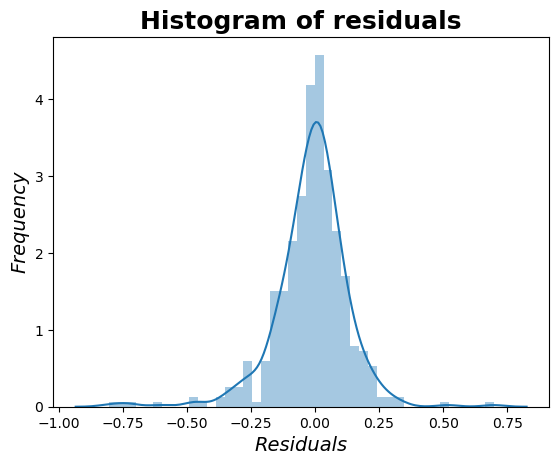

In [73]:
# Histogram of residuals
sns.distplot(residuals)
plt.xlabel('Residuals', fontsize=14, fontstyle='italic')
plt.ylabel('Frequency', fontsize=14, fontstyle='italic')
plt.title("Histogram of residuals", fontsize=18, fontweight='bold')
plt.show()

### **Subjective Question3**
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [74]:
# Remove top 5 predictors from the model
# Let's remove the top 5 predictors from the model
X_train_rfe2=X_train_rfe.drop(['OverallCond_3','OverallQual_9','Neighborhood_Crawfor','OverallCond_4','CentralAir_Y'], axis=1)
X_test_rfe2=X_test_rfe.drop(['OverallCond_3','OverallQual_9','Neighborhood_Crawfor','OverallCond_4','CentralAir_Y'], axis=1)

# Fitting the model with alpha=0.001
alpha = 0.001
lasso2 = Lasso(alpha=alpha)

lasso2.fit(X_train_rfe2, y_train)
lasso2_coeff = lasso2.coef_
y_test_pred = lasso2.predict(X_test_rfe2)
print('R2 score of test data:', r2_score(y_test, y_test_pred))
print('RMSE of test data:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE of test data:', mean_squared_error(y_test, y_test_pred))
lasso2_coeff=pd.DataFrame({'Features':X_train_rfe2.columns, 'Coefficient':lasso2_coeff.round(4), 'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso2_coeff.round(4))})
lasso2_coeff=lasso2_coeff.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
print("The top 5 predictors are: ")
lasso2_coeff.head(5)


R2 score of test data: 0.8660783644559
RMSE of test data: 0.1419735186446145
MSE of test data: 0.0201564799963327
The top 5 predictors are: 


Features  Coefficient  Abs_Coefficient_Lasso(Desc_Sort)
128        OverallCond_9       0.1160                            0.1160
126        OverallCond_7       0.1123                            0.1123
127        OverallCond_8       0.1100                            0.1100
230       Functional_Typ       0.0924                            0.0924
143  Exterior1st_BrkFace       0.0842                            0.0842